<a href="https://colab.research.google.com/github/Dbriane208/Python-for-Data-Science/blob/main/Face_Mask_Detection_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [2]:
# configuring the path of kaggle.json file

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

**Importing the Face Mask Dataset**

In [3]:
# API to Fetch the dataset from kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

100% 163M/163M [00:08<00:00, 20.0MB/s]
100% 163M/163M [00:08<00:00, 19.8MB/s]


In [4]:
# Extracting the compressed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print("The dataset is extracted")

The dataset is extracted


In [5]:
# Listing the folders we have in our directory
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


**Importing the Required Libraries**

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [7]:
# Analysing the images we have in the data directory
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[5:])


['with_mask_2825.jpg', 'with_mask_3562.jpg', 'with_mask_2382.jpg', 'with_mask_1181.jpg', 'with_mask_1607.jpg']
['with_mask_808.jpg', 'with_mask_1943.jpg', 'with_mask_3188.jpg', 'with_mask_2013.jpg', 'with_mask_3121.jpg', 'with_mask_197.jpg', 'with_mask_1331.jpg', 'with_mask_617.jpg', 'with_mask_1794.jpg', 'with_mask_346.jpg', 'with_mask_137.jpg', 'with_mask_1605.jpg', 'with_mask_3663.jpg', 'with_mask_2555.jpg', 'with_mask_881.jpg', 'with_mask_1722.jpg', 'with_mask_2488.jpg', 'with_mask_3620.jpg', 'with_mask_3590.jpg', 'with_mask_2802.jpg', 'with_mask_3180.jpg', 'with_mask_1628.jpg', 'with_mask_3266.jpg', 'with_mask_1497.jpg', 'with_mask_3681.jpg', 'with_mask_1567.jpg', 'with_mask_1774.jpg', 'with_mask_356.jpg', 'with_mask_415.jpg', 'with_mask_1251.jpg', 'with_mask_2355.jpg', 'with_mask_2499.jpg', 'with_mask_381.jpg', 'with_mask_2189.jpg', 'with_mask_1531.jpg', 'with_mask_1863.jpg', 'with_mask_196.jpg', 'with_mask_3696.jpg', 'with_mask_3420.jpg', 'with_mask_934.jpg', 'with_mask_21.jpg',

In [8]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[5:])

['without_mask_3286.jpg', 'without_mask_1761.jpg', 'without_mask_3801.jpg', 'without_mask_2125.jpg', 'without_mask_1573.jpg']
['without_mask_3193.jpg', 'without_mask_130.jpg', 'without_mask_2306.jpg', 'without_mask_2976.jpg', 'without_mask_2850.jpg', 'without_mask_1836.jpg', 'without_mask_2261.jpg', 'without_mask_2790.jpg', 'without_mask_3291.jpg', 'without_mask_309.jpg', 'without_mask_2399.jpg', 'without_mask_777.jpg', 'without_mask_423.jpg', 'without_mask_3002.jpg', 'without_mask_3669.jpg', 'without_mask_519.jpg', 'without_mask_2802.jpg', 'without_mask_565.jpg', 'without_mask_1554.jpg', 'without_mask_2577.jpg', 'without_mask_279.jpg', 'without_mask_3686.jpg', 'without_mask_3201.jpg', 'without_mask_1201.jpg', 'without_mask_1449.jpg', 'without_mask_110.jpg', 'without_mask_3118.jpg', 'without_mask_3586.jpg', 'without_mask_2027.jpg', 'without_mask_938.jpg', 'without_mask_2938.jpg', 'without_mask_3796.jpg', 'without_mask_1822.jpg', 'without_mask_2195.jpg', 'without_mask_2361.jpg', 'withou

In [9]:
# Getting the count of the images
print('Number of with mask images :',len(with_mask_files))
print('Number of without mask images :',len(without_mask_files))

Number of with mask images : 3725
Number of without mask images : 3828


**Creating labels for the two class of Images**

If an image has a mask : label is 1

If an image has no mask : label is 0

In [10]:
# Creating the labels
with_mask_labels = [1]*3725
without_mask_labels = [0]*3828

# Printing the images after labeling
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [11]:
# checking the size of the labeled images
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [12]:
# Combining the lists into one label
labels = with_mask_labels + without_mask_labels
print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Image Visualization**

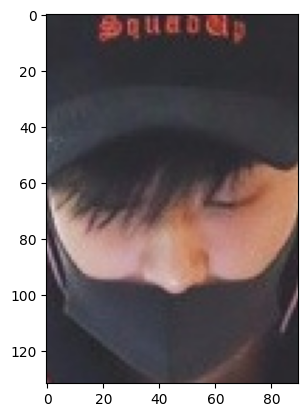

In [13]:
# Displaying the images with matplotlib
# Images with mask
img = mpimg.imread('/content/data/with_mask/with_mask_513.jpg')
imgplot = plt.imshow(img)
plt.show()

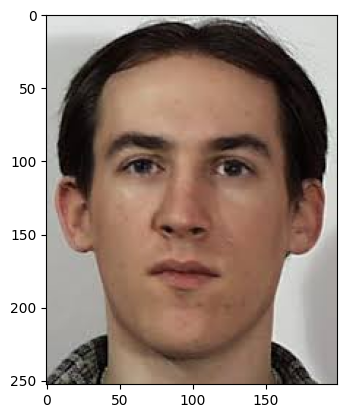

In [14]:
# Images without mask
img = mpimg.imread('/content/data/without_mask/without_mask_2364.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image processing**

In [15]:
# Reshaping the images and converting their shape into numpy array
with_mask_path =  "/content/data/with_mask/"

data = []

for img_file in with_mask_files:
  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

without_mask_path =  "/content/data/without_mask/"

for img_file in without_mask_files:
  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [16]:
# checking the type, size of our data and type of our first mumpy array
type(data) , len(data), type(data[0])

(list, 7553, numpy.ndarray)

In [17]:
# checking the shape of our first numpy array
data[0].shape

(128, 128, 3)

In [18]:
# converting the image list and label list to numpy arrays
X = np.array(data)
Y = np.array(labels)
type(X),type(Y)

(numpy.ndarray, numpy.ndarray)

In [19]:
# Printing the shape of shape of X and Y
# The output of X will be no.of images,the width and height of the image ,color representation of the images
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


**Train Test Split**

In [20]:
X_train,X_test,Y_train,X_test = train_test_split(X,Y,test_size=0.2,random_state=2)

print("Spliting done")

Spliting done


In [21]:
# Printing the shape of our data
print(X.shape,X_train.shape,X_test.shape)
print(Y.shape,Y_train.shape,Y_train.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511,)
(7553,) (6042,) (6042,)


In [22]:
# Scaling the data to make the model perform better
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [23]:
# checking the data before scaling
X_train[0]

array([[[155, 147, 136],
        [155, 147, 136],
        [156, 148, 137],
        ...,
        [158, 150, 139],
        [157, 149, 138],
        [156, 148, 137]],

       [[156, 148, 137],
        [156, 148, 137],
        [156, 148, 137],
        ...,
        [158, 150, 139],
        [157, 149, 138],
        [156, 148, 137]],

       [[157, 149, 138],
        [157, 149, 138],
        [156, 148, 137],
        ...,
        [158, 150, 139],
        [157, 149, 138],
        [156, 148, 137]],

       ...,

       [[133, 123, 114],
        [133, 123, 114],
        [133, 123, 114],
        ...,
        [133, 123, 114],
        [132, 122, 113],
        [131, 121, 112]],

       [[131, 121, 112],
        [132, 122, 113],
        [133, 123, 114],
        ...,
        [132, 122, 113],
        [132, 122, 113],
        [131, 121, 112]],

       [[131, 121, 112],
        [133, 123, 114],
        [134, 124, 115],
        ...,
        [132, 122, 113],
        [132, 122, 113],
        [132, 122, 113]]

In [24]:
# checking the data after scaling .. in the range of 0 and 1
X_train_scaled[0]

array([[[0.60784314, 0.57647059, 0.53333333],
        [0.60784314, 0.57647059, 0.53333333],
        [0.61176471, 0.58039216, 0.5372549 ],
        ...,
        [0.61960784, 0.58823529, 0.54509804],
        [0.61568627, 0.58431373, 0.54117647],
        [0.61176471, 0.58039216, 0.5372549 ]],

       [[0.61176471, 0.58039216, 0.5372549 ],
        [0.61176471, 0.58039216, 0.5372549 ],
        [0.61176471, 0.58039216, 0.5372549 ],
        ...,
        [0.61960784, 0.58823529, 0.54509804],
        [0.61568627, 0.58431373, 0.54117647],
        [0.61176471, 0.58039216, 0.5372549 ]],

       [[0.61568627, 0.58431373, 0.54117647],
        [0.61568627, 0.58431373, 0.54117647],
        [0.61176471, 0.58039216, 0.5372549 ],
        ...,
        [0.61960784, 0.58823529, 0.54509804],
        [0.61568627, 0.58431373, 0.54117647],
        [0.61176471, 0.58039216, 0.5372549 ]],

       ...,

       [[0.52156863, 0.48235294, 0.44705882],
        [0.52156863, 0.48235294, 0.44705882],
        [0.52156863, 0